In [1]:
!pip install mrjob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 KB 3.0 MB/s eta 0:00:0000:0100:01


In [2]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 46.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 51.2 MB/s eta 0:00:0000:0100:01


In [53]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 59.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.2/293.2 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 58.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 KB 15.9 MB/s eta 0:00:00


In [56]:
from matplotlib import pyplot as plt

In [13]:
%%file task1.py

from mrjob.job import MRJob
from mrjob.step import MRStep

class MRLinesCount(MRJob):
    def steps(self):
        return [
            MRStep(mapper=self.mapper, combiner=self.combiner,reducer=self.reducer_count),
            MRStep(reducer=self.reducer_max)
        ]

    def mapper(self, _, line):
        character = line.split('" "')[1]
        yield (character, 1)

    def combiner(self, character, counts):
        yield (character, sum(counts))

    def reducer_count(self, character, count):
        yield None, (character, sum(count))

    def reducer_max(self, _, character_counts):
        for character_count in sorted(character_counts, key=lambda x: x[1], reverse=True)[:20]:
            yield character_count
        
if __name__ == "__main__":
    MRLinesCount.run()

Overwriting task1.py


In [14]:
file_names = ['SW_EpisodeIV.txt', 'SW_EpisodeV.txt', 'SW_EpisodeVI.txt']

In [15]:
for file_name in file_names:
    output_file = 'Result_'+ file_name
    !python3 task1.py $file_name > $output_file

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.031015.239614
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231206.031015.239614/output
Streaming final output from /tmp/task1.root.20231206.031015.239614/output...
Removing temp directory /tmp/task1.root.20231206.031015.239614...
No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.031015.514597
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231206.031015.514597/output
Streaming final output from /tmp/task1.root.20231206.031015.514597/output...
Removing temp directory /tmp/task1.root.20231206.031015.514597...
No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.031015.785687
Running step 1 of 2...
Running 

In [25]:
!python3 task1.py SW_EpisodeIV.txt SW_EpisodeV.txt SW_EpisodeVI.txt > Result_EpisodeAll.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.031740.764150
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231206.031740.764150/output
Streaming final output from /tmp/task1.root.20231206.031740.764150/output...
Removing temp directory /tmp/task1.root.20231206.031740.764150...


In [27]:
for file_name in file_names:
    !hadoop fs -put $file_name /

2023-12-06 06:28:05 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-12-06 06:28:06 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-12-06 06:28:07 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [29]:
for file_name in file_names:
    input_file = 'hdfs://namenode:8020/' + file_name
    output_file = 'Hadoop_Result_'+ file_name
    !python3 task1.py -r hadoop $input_file --output $output_file

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231206.033103.689635
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.033103.689635/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.033103.689635/files/
Running step 1 of 2...
  Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
  packageJobJar: [/tmp/hadoop-unjar5406653580624295745/] [] /tmp/streamjob4158068682290825093.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.24.0.5:8032
  Connecting to ResourceManager at resourcemanager/172.24.0.5:8032
  Disabling

In [32]:
for file_name in file_names:
    input_file = 'hdfs://namenode:8020/Hadoop_Result_' + file_name + '/part-00000'
    output_file = 'Hadoop_Result_'+ file_name
    !hadoop fs -get $input_file $output_file

2023-12-06 06:38:04 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-12-06 06:38:05 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-12-06 06:38:06 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [50]:
!python3 task1.py -r hadoop hdfs://namenode:8020/SW_EpisodeIV.txt hdfs://namenode:8020/SW_EpisodeV.txt hdfs://namenode:8020/SW_EpisodeVI.txt --output /Hadoop_Result_EpisodeAll.txt

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231206.035856.711014
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.035856.711014/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.035856.711014/files/
Running step 1 of 2...
  Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
  packageJobJar: [/tmp/hadoop-unjar8819616519387196730/] [] /tmp/streamjob5203910252484199720.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.24.0.5:8032
  Connecting to ResourceManager at resourcemanager/172.24.0.5:8032
  Disabling

In [52]:
!hadoop fs -get hdfs://namenode:8020/Hadoop_Result_EpisodeAll.txt/part-00000 Hadoop_Result_EpisodeAll.txt

2023-12-06 07:00:28 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


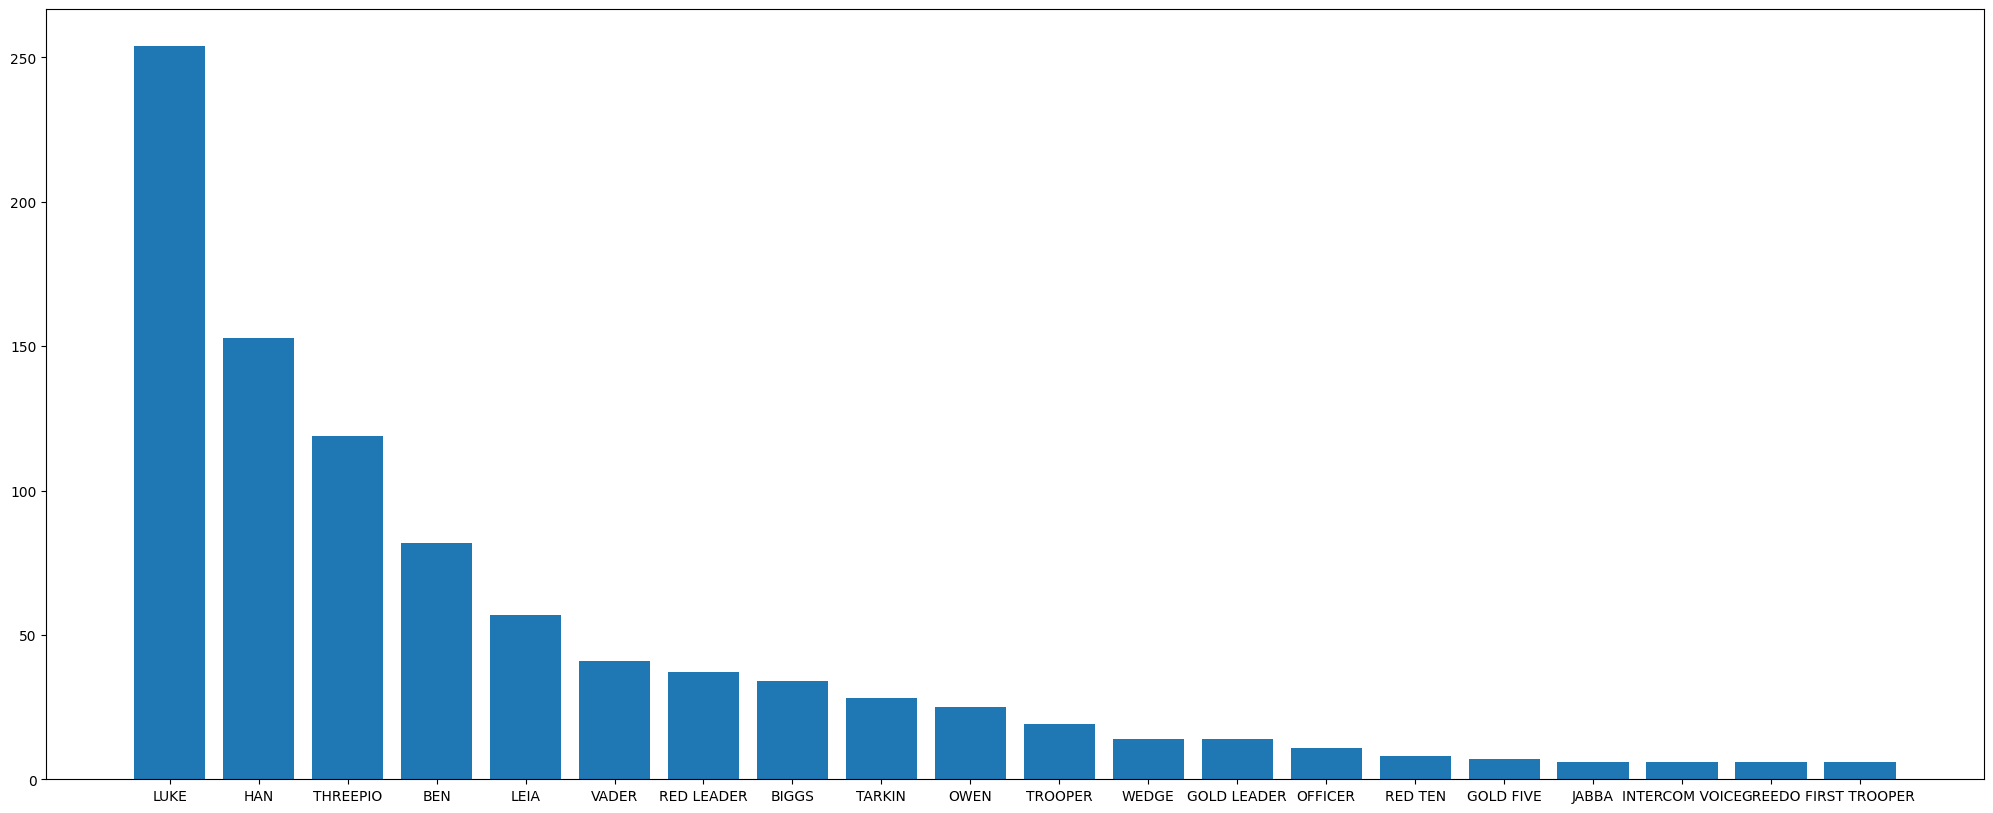

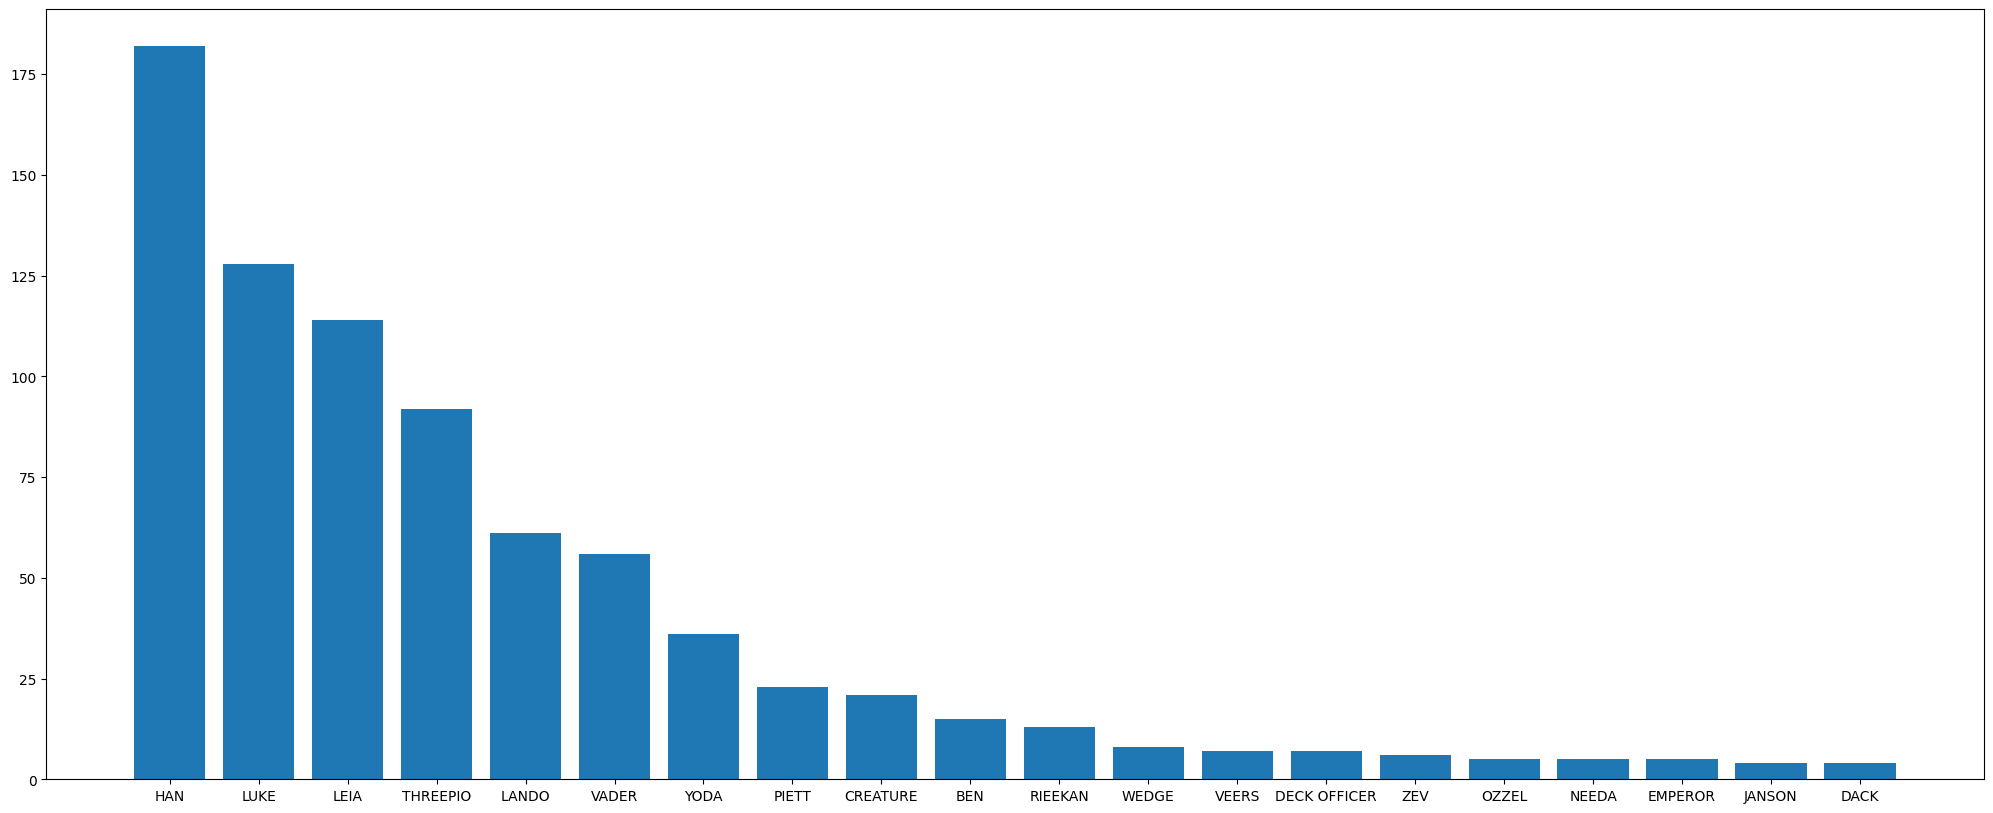

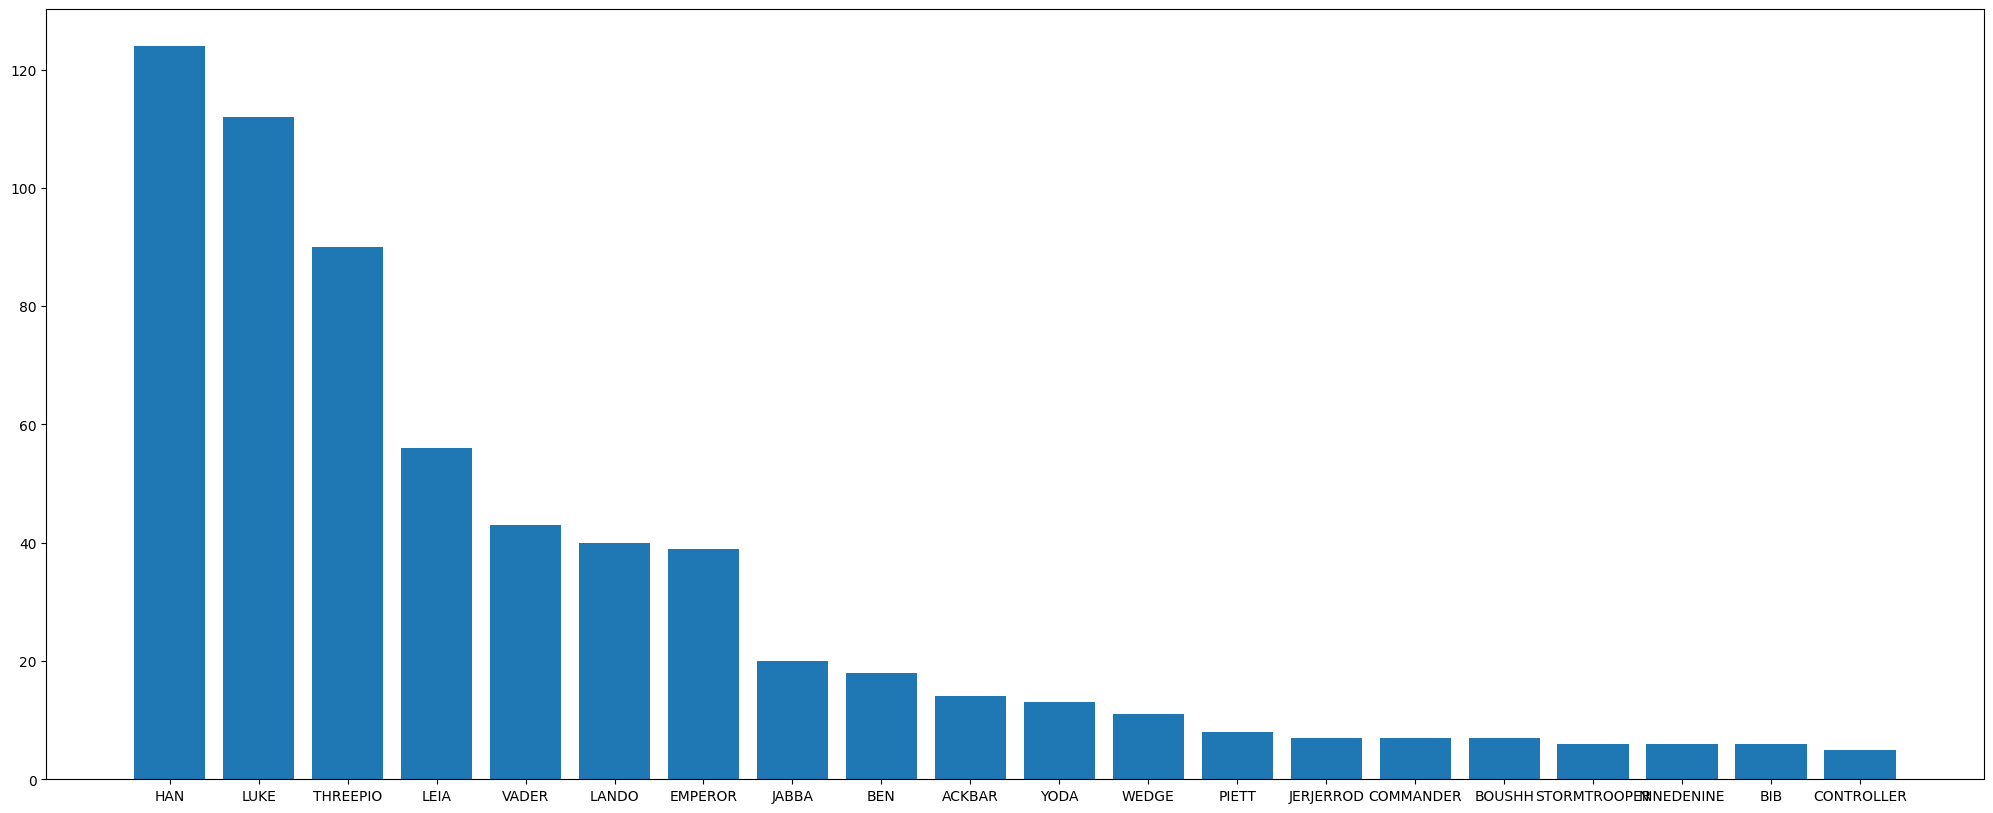

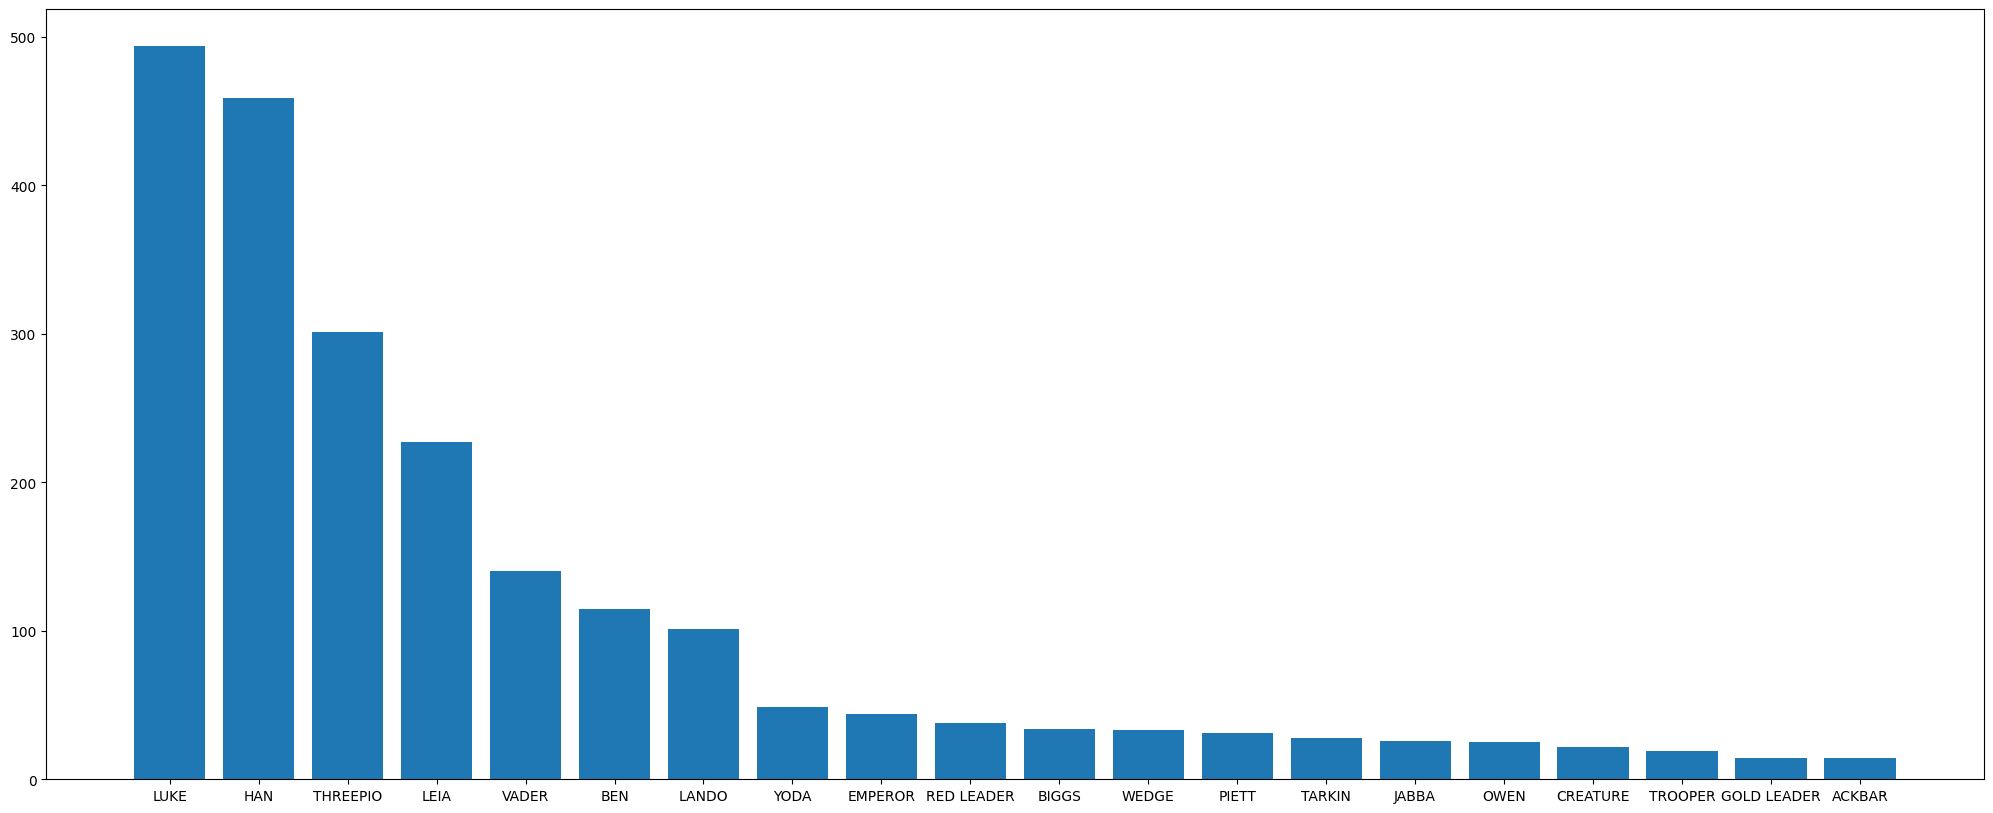

In [83]:
def build_plot(file_name):
    x, y = [], []
    with open(file_name) as file:
        for line in file:
            pair = line.replace('"', '').replace('\n', '').split('\t')
            x.append(pair[0])
            y.append(int(pair[1]))
    plt.figure(figsize=(25,10))
    plt.bar(x, y)
    plt.show()

hadoop_results = ['Hadoop_Result_SW_EpisodeIV.txt', 'Hadoop_Result_SW_EpisodeV.txt', 'Hadoop_Result_SW_EpisodeVI.txt', 'Hadoop_Result_EpisodeAll.txt']
for result in hadoop_results:
    build_plot(result)